# Chapter3 Logistic Regression

## 1. Logistic Regression

### 1.1 visualizing the data

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
data = pd.read_csv('ex2data1.txt', header=None, names=['score1', 'score2', 'admit_state'])
data.head()

,score1,score2,admit_state
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


先分类，录取和未被录取

In [22]:
data_admit = data[data.admit_state == 1]
data_not_admit = data[data.admit_state == 0]
data_admit.head()

,score1,score2,admit_state
3,60.182599,86.308552,1
4,79.032736,75.344376,1
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1


绘制图像

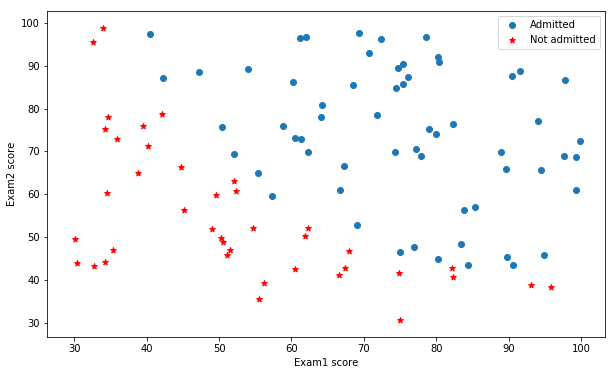

In [24]:
figure, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data_admit.score1, data_admit.score2, label='Admitted')
ax.scatter(data_not_admit.score1, data_not_admit.score2, c='r', marker='*', label='Not admitted')
ax.legend(loc='best')
ax.set_xlabel('Exam1 score')
ax.set_ylabel('Exam2 score')
plt.show()

### 2.1 implementation

#### sigmoid function

sigmoid函数也就是logistic函数，将任意数映射到[0, 1]区间，公式为：
> $g\left( z\right) =\dfrac {1}{1+e^{-z}}$

> $h_{\theta }\left( x\right) =\dfrac {1}{1+e^{-\theta ^{T}x}}$

In [25]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

绘制成图像查看一下

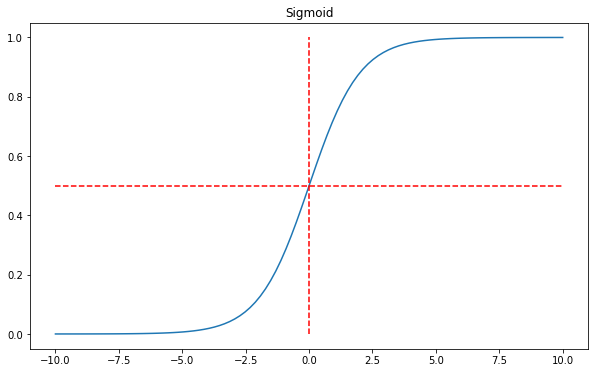

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
x = np.linspace(-10, 10, 100)
y = [sigmoid(i) for i in x]
ax.plot(x, y)
ax.plot([-10, 10], [0.5, 0.5], 'r--')
ax.plot([0, 0], [0, 1], 'r--')
ax.set_title('Sigmoid')
plt.show()

#### Cost function and gradient

logistic cost function:$J\left( \theta \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}$

In [33]:
def cost(X, y, theta):
    m = X.shape[0]
    X = np.mat(X)
    y = np.mat(y)
    theta = np.mat(theta)
    first = y*np.log(sigmoid(X * theta.T))
    second = (1-y) * np.log(1 - sigmoid(X * theta.T))
    return - np.sum((first + second)) / m 

使用上一次构造的函数

In [135]:
# 获得X和y
def get_X(data):
    m = data.shape[0]
    X = data.iloc[:, :-1]
    X = np.concatenate((np.ones((m, 1)), X), axis=1)
    return X

def get_y(data):
    return data.iloc[:, -1]

In [255]:
X = get_X(data)
y = get_y(data)
theta = np.zeros(3)
X[:10]

array([[  1.        ,  34.62365962,  78.02469282],
       [  1.        ,  30.28671077,  43.89499752],
       [  1.        ,  35.84740877,  72.90219803],
       [  1.        ,  60.18259939,  86.3085521 ],
       [  1.        ,  79.03273605,  75.34437644],
       [  1.        ,  45.08327748,  56.31637178],
       [  1.        ,  61.10666454,  96.51142588],
       [  1.        ,  75.02474557,  46.55401354],
       [  1.        ,  76.0987867 ,  87.42056972],
       [  1.        ,  84.43281996,  43.53339331]])

计算cost

In [183]:
cost(X, y, theta)

0.69314718055994529

执行梯度下降算法，批量计算借用向量化：

$\frac{\partial J\left( \theta \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$

In [243]:
def gradient_descent(X, y, theta, alpha = 0.001, iter_nums = 100):
    X= np.mat(X)
    y = np.mat(y).T
    theta = np.mat(theta).T
    m = X.shape[0]
    
    for i in range(iter_nums):
        h = sigmoid(X*theta)
        error = h - y
        theta = theta - alpha * X.T * error / m
    return theta

final_theta = gradient_descent(X, y, theta, 0.001, 500)    
final_theta

matrix([[-0.03477121],
        [ 0.01066652],
        [ 0.0007217 ]])

In [244]:
cost(X, y, final_theta.T)

0.62739277323576081

#### evaluating ligistic regression

根据建立的模型，就可以做出预测了,具体原则是：如果simoid值大于等于0.5，判断为1，否则为0

In [251]:
def predict(X, theta):
    prob = sigmoid(X*theta.T)
    return [1 if x >= 0.5 else 0 for x in prob]

In [256]:
predictions = predict(X, final_theta.T)
correct = [1 if ((a==1 and b==1) or (a==0 and b==0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = sum(map(int, correct)) % len(correct)
accuracy

60

准确度仅仅达到60%，效果一般

## 2. Regularized logistic regression

正则化的意义在于避免模型的过拟合，提高模型的泛化能力

In [315]:
data2 = pd.read_csv('ex2data2.txt', header=None, names=['Test1', 'Test2', 'Accepted'])
data2.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


### 2.1 visualizeing the data

In [316]:
accepted = data2[data2.iloc[:, 2] == 1]
not_accepted = data2[data2.iloc[:, 2] == 0]
accepted.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


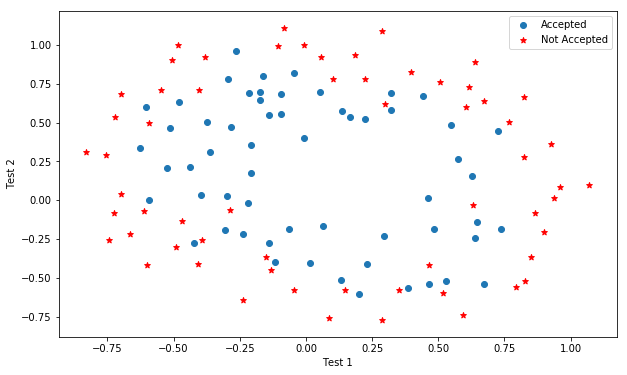

In [313]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(accepted.iloc[:, 0], accepted.iloc[:, 1], label='Accepted')
ax.scatter(not_accepted.iloc[:, 0], not_accepted.iloc[:, 1], c='r', marker = '*', label='Not Accepted')
ax.legend(loc='best')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.show()

可以看出没有一条明显的线性边界，边界应该是个维度较高的多项式

### 2.2 feature mapping

通过映射，转换到高维空间

In [317]:
degree = 6
x1 = data2.iloc[:, 0]
x2 = data2.iloc[:, 1]

data2.insert(3, 'Ones', 1)

for i in range(1, degree+1):
    for j in range(0, i+1):
        data2['F' + str(i-j) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

data2.drop('Test1', axis=1, inplace=True)
data2.drop('Test2', axis=1, inplace=True)

data2.head()

,Accepted,Ones,F10,F01,F20,F11,F02,F30,F21,F12,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,1,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


### 2.3 cost function and gradient

正则化的cost function要添加正则项：

$J\left( \theta \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$

lambda的值太大会导致模型欠拟合，过小会导致过拟合。

In [323]:
def costReg(X, y, theta, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    m = X.shape[0]
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learningRate / (2 * m) * np.sum(np.power(theta[:,2:], 2)))
    return np.sum(first + second) / m + reg

对应的gradient descent：

${{\theta }_{j}}:={{\theta }_{j}}(1-a\frac{\lambda }{m})-a\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{j}^{(i)}}$

In [333]:
'''def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])
    
    return grad
    '''
def gradient_reg(X, y, theta, alpha = 0.001, iter_nums = 500, learningRate=1):
    X= np.mat(X)
    y = np.mat(y).T
    theta = np.mat(theta).T
    m = X.shape[0]
    
    for i in range(iter_nums):
        h = sigmoid(X*theta)
        error = h - y
        theta = theta*(1-alpha*learningRate/m) - alpha * X.T * error / m
    return theta

In [373]:
X2 = data2.iloc[:,1:]
y2 = data2.iloc[:,0]
X2 = np.mat(X2)
theta2 = np.zeros(28)
alpha = 0.01
iterations = 500
learningRate = 1

In [365]:
cost(theta2, X2, y2, learningRate)

81.791367306073539

In [366]:
final_theta = gradient_reg(X2, y2, theta2, alpha, iterations, learningRate)
final_theta

matrix([[ 0.06465415],
        [-0.05266549],
        [ 0.04816647],
        [-0.20558324],
        [-0.05369835],
        [-0.13091455],
        [-0.06247407],
        [-0.02813578],
        [-0.0336208 ],
        [-0.07368138],
        [-0.16512489],
        [-0.00887892],
        [-0.05354885],
        [-0.01421434],
        [-0.14957832],
        [-0.07573286],
        [-0.01788726],
        [-0.01304763],
        [-0.02374381],
        [-0.01968248],
        [-0.11322415],
        [-0.12997697],
        [-0.00368338],
        [-0.02700614],
        [-0.00128955],
        [-0.03033841],
        [-0.00629963],
        [-0.15028398]])

In [330]:
result2 = opt.fmin_tnc(func=cost, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate))
result2

(array([ 1.27271027,  0.62529965,  1.18111686, -2.01987399, -0.91743189,
        -1.43166929,  0.12393227, -0.36553118, -0.35725404, -0.17516292,
        -1.45817009, -0.05098418, -0.61558554, -0.27469165, -1.19271298,
        -0.2421784 , -0.20603298, -0.04466178, -0.27778951, -0.29539514,
        -0.45645981, -1.04319155,  0.02779373, -0.2924487 ,  0.0155576 ,
        -0.32742405, -0.1438915 , -0.92467487]), 32, 1)

In [374]:
predictions = predict(X2, final_theta.T)
correct = [1 if ((a==1 and b==1) or (a==0 and b==0)) else 0 for (a, b) in zip(predictions, list(y2))]
accuracy = sum(map(int, correct)) % len(correct)
accuracy

118
118


78

可以看出，准确率有了显著的提升，这就是正则化所带来的效果！